## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Import Data

In [2]:
data = pd.read_excel('C:\\Users\\DELL\\PycharmProjects\\Ecommerce customer segmentation\\cust_data.xlsx')

## Data Cleaning

In [3]:
data.shape

(30000, 38)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
data['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


In [8]:
## imputing missing values using probability of already existing values.
gender_probs = data['Gender'].value_counts(normalize=True)

def impute_gender(row):
    if pd.isna(row['Gender']):
        return np.random.choice(gender_probs.index, p=gender_probs.values)
    else:
        return row['Gender']

data['Gender'] = data.apply(impute_gender, axis=1)

In [9]:
data.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

# ---------------------------------------EDA--------------------------------------------

### 1. Male & Female shoppers split %

In [10]:
data.groupby(['Gender']).sum()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,369369577,100729,6285,5143,5479,4747,4063,3667,3103,1854,2169,3106,9273,5342,3764,4245,2805,7038,1119,18568,5996,11675,6559,2768,711,11676,3347,2778,7167,10550,4220,2052,1552,4643,2898,2193,1739
M,80645423,24365,1738,2427,1209,93,243,526,105,1489,659,1098,573,938,480,588,378,1969,323,4076,1441,2450,1181,795,248,1165,293,298,967,552,549,278,168,1123,593,448,388


In [13]:
pct['Orders']

Gender
F    0.805226
M    0.194774
Name: Orders, dtype: float64

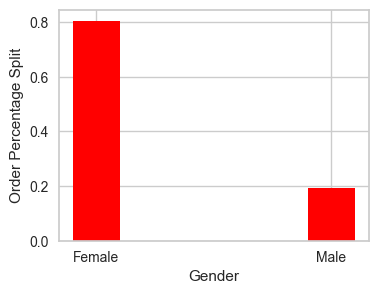

In [12]:
# Percentage split of F/M in orders
pct = data.groupby(['Gender']).sum().apply(lambda x:x/data['Orders'].sum())

plt.figure(figsize=(4,3))
plt.bar(['Female','Male'],pct['Orders'], color='red', width=0.2)
plt.xlabel('Gender')
plt.ylabel('Order Percentage Split')
plt.show()

### 2. Average orders made by Male & Female

In [14]:
# Average Orders by M & F
((data.groupby('Gender').sum())/(data[data['Orders']>0].groupby('Gender').count()))['Orders']

Gender
F    5.494709
M    5.570416
Name: Orders, dtype: float64

### 3. Average Searches per Brand (for every 100 searches)

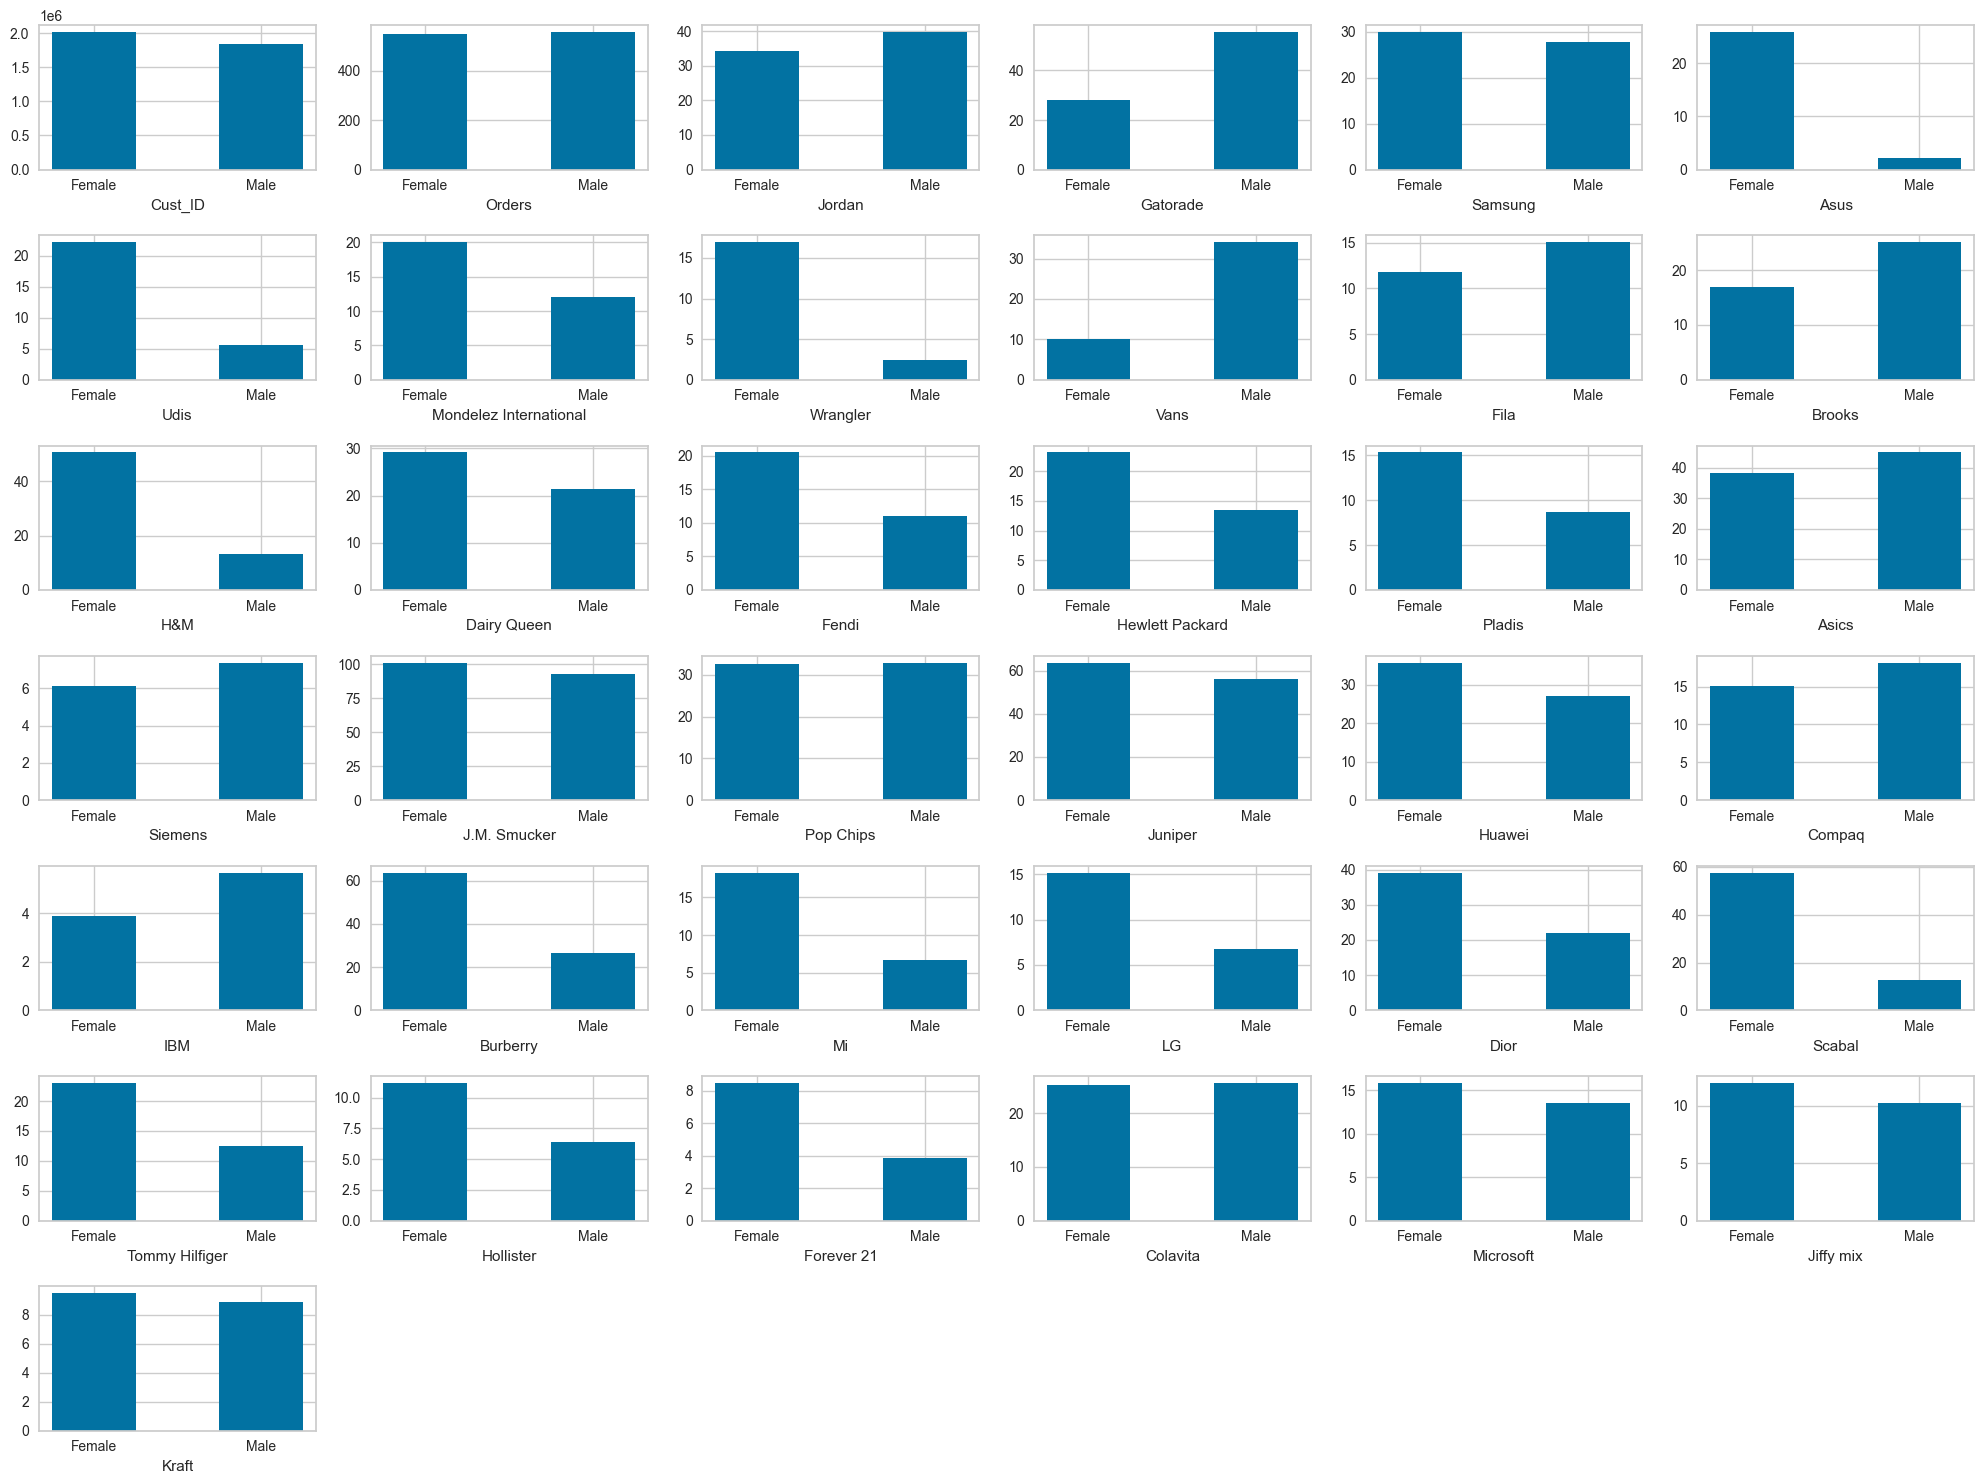

In [15]:
plot = ((data.groupby('Gender').sum())/(data[data['Orders']>0].groupby('Gender').count()))*100
cols = plot.columns

plt.figure(figsize=(20,15))
p = 1
for col in cols:
    if p<=38:
        ax = plt.subplot(7,6, p)
        plt.bar(['Female','Male'], plot[col], width=0.5)
        plt.xlabel(col)
    p += 1

plt.tight_layout()
plt.show()

### 4. 4 categories present in data

In [17]:
data_foot = data[['Cust_ID', 'Gender', 'Orders','Jordan', 'Fila', 'Brooks', 'Asics', 'Vans', ]]
data_food = data[['Cust_ID', 'Gender', 'Orders','Gatorade','Udis','Mondelez International','Pladis','J.M. Smucker','Pop Chips','Colavita',
                  'Jiffy mix','Kraft','Dairy Queen',]]
data_apparel = data[['Cust_ID', 'Gender', 'Orders','Wrangler','H&M','Fendi','Juniper','Burberry', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21',]]
data_tech = data[['Cust_ID', 'Gender', 'Orders','Samsung','Asus','Hewlett Packard', 'Siemens','Huawei','Compaq','IBM', 'Mi', 'LG','Microsoft', ]]

In [18]:
def plotting(inp):
    cols = inp.columns
    plt.figure(figsize=(20,10))
    p = 1
    for col in cols:
        if p<=10:
            ax = plt.subplot(2,5, p)
            plt.bar(['Female','Male'], plot[col], width=0.5)
            plt.xlabel(col)
        p += 1
    plt.tight_layout()
    plt.show()

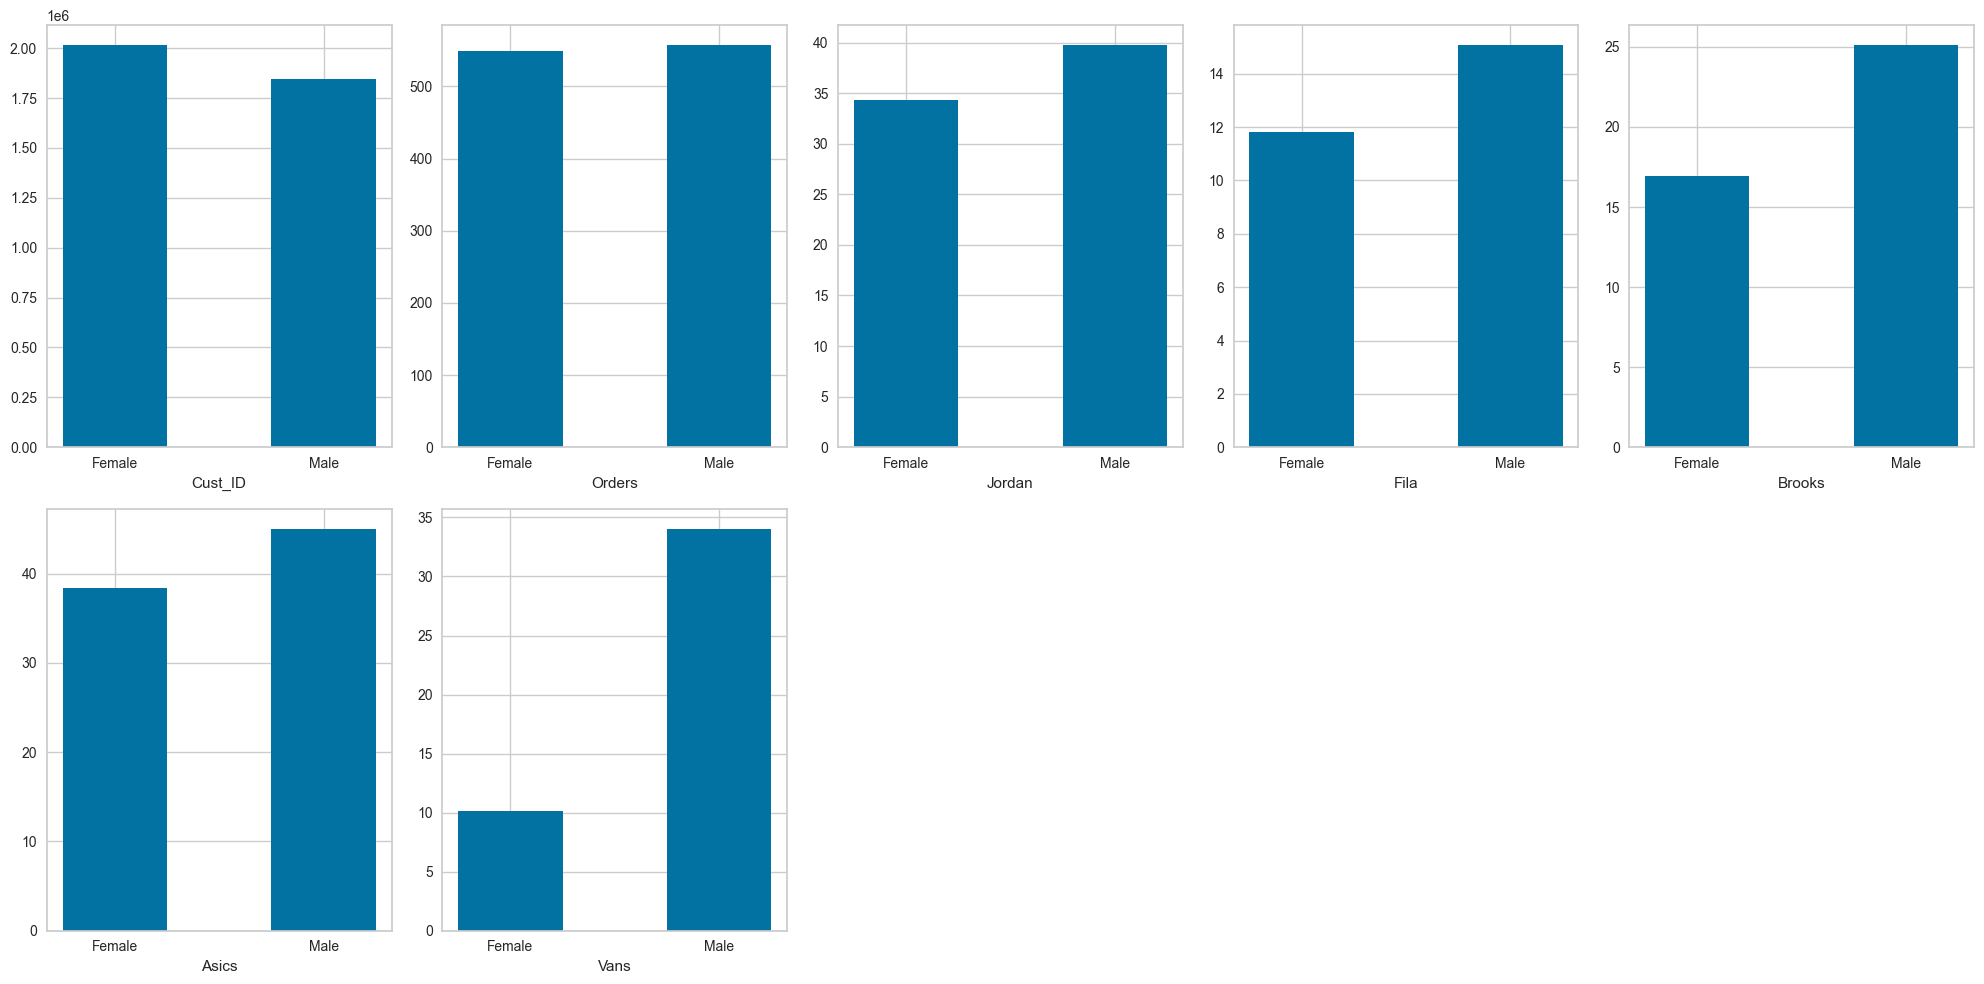

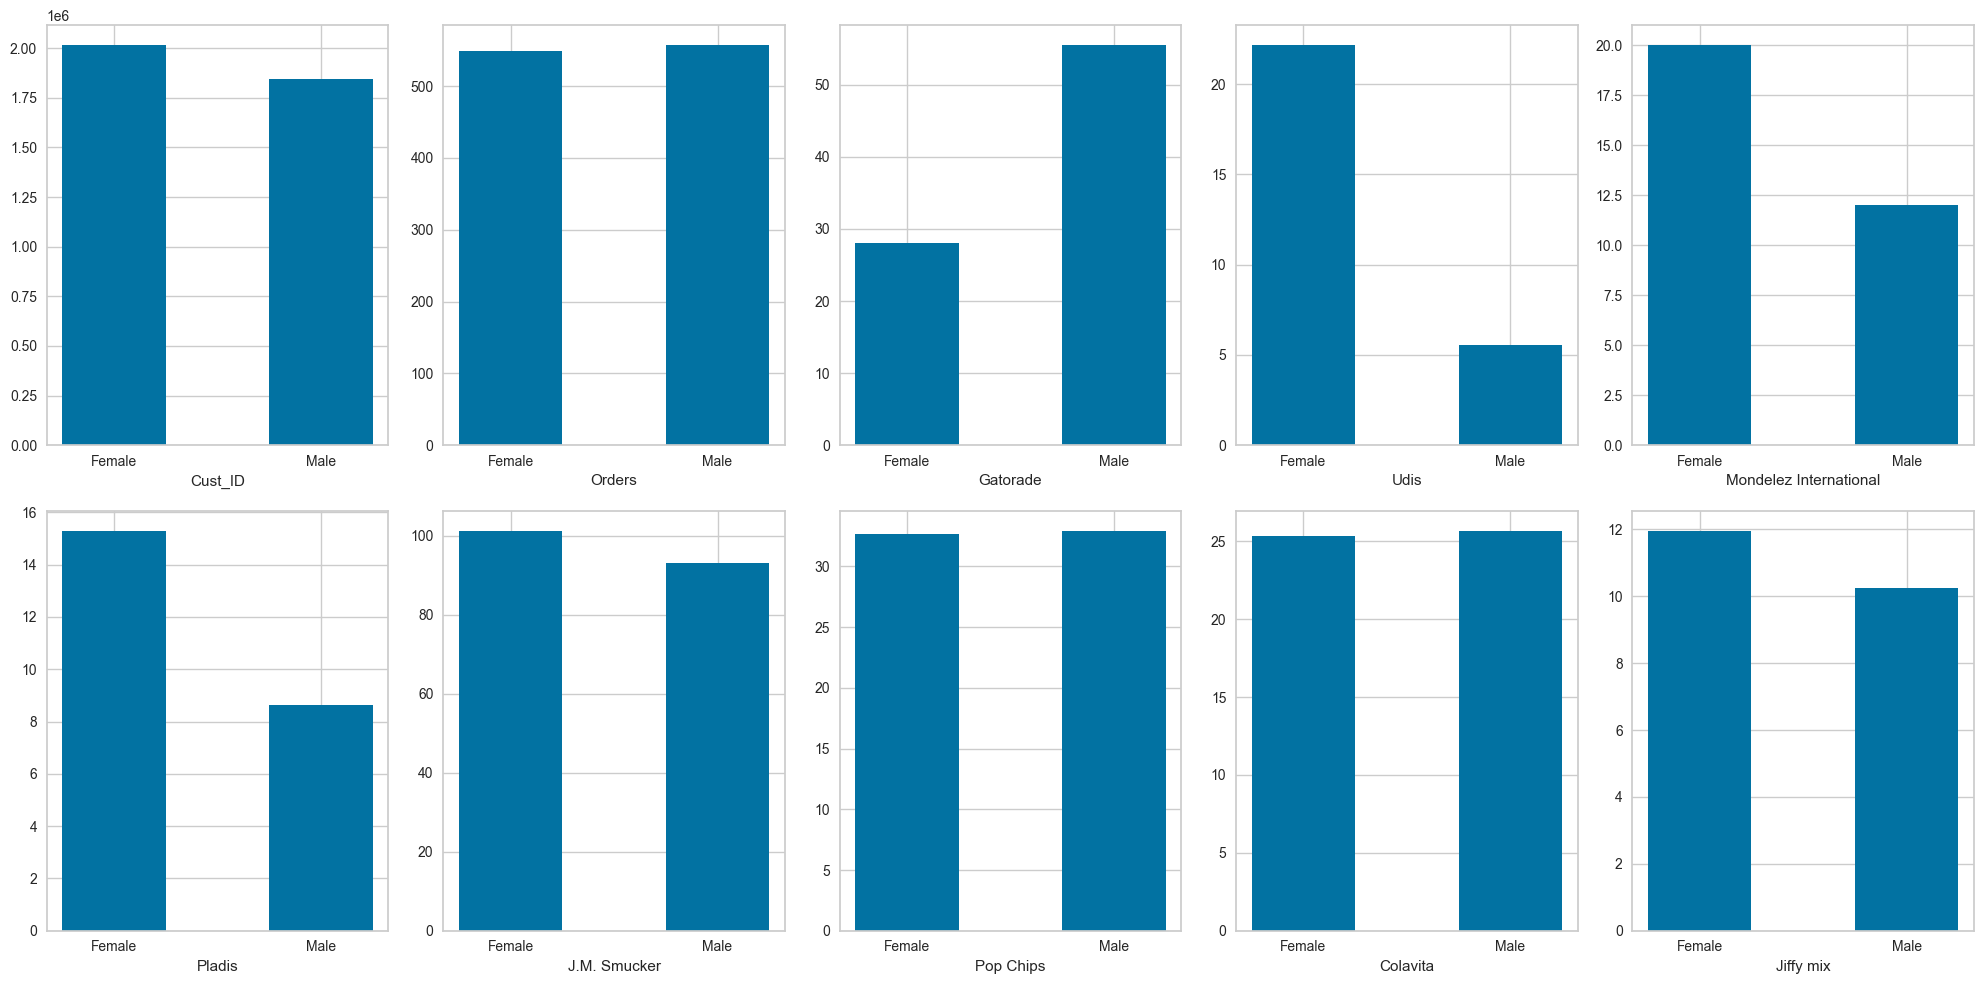

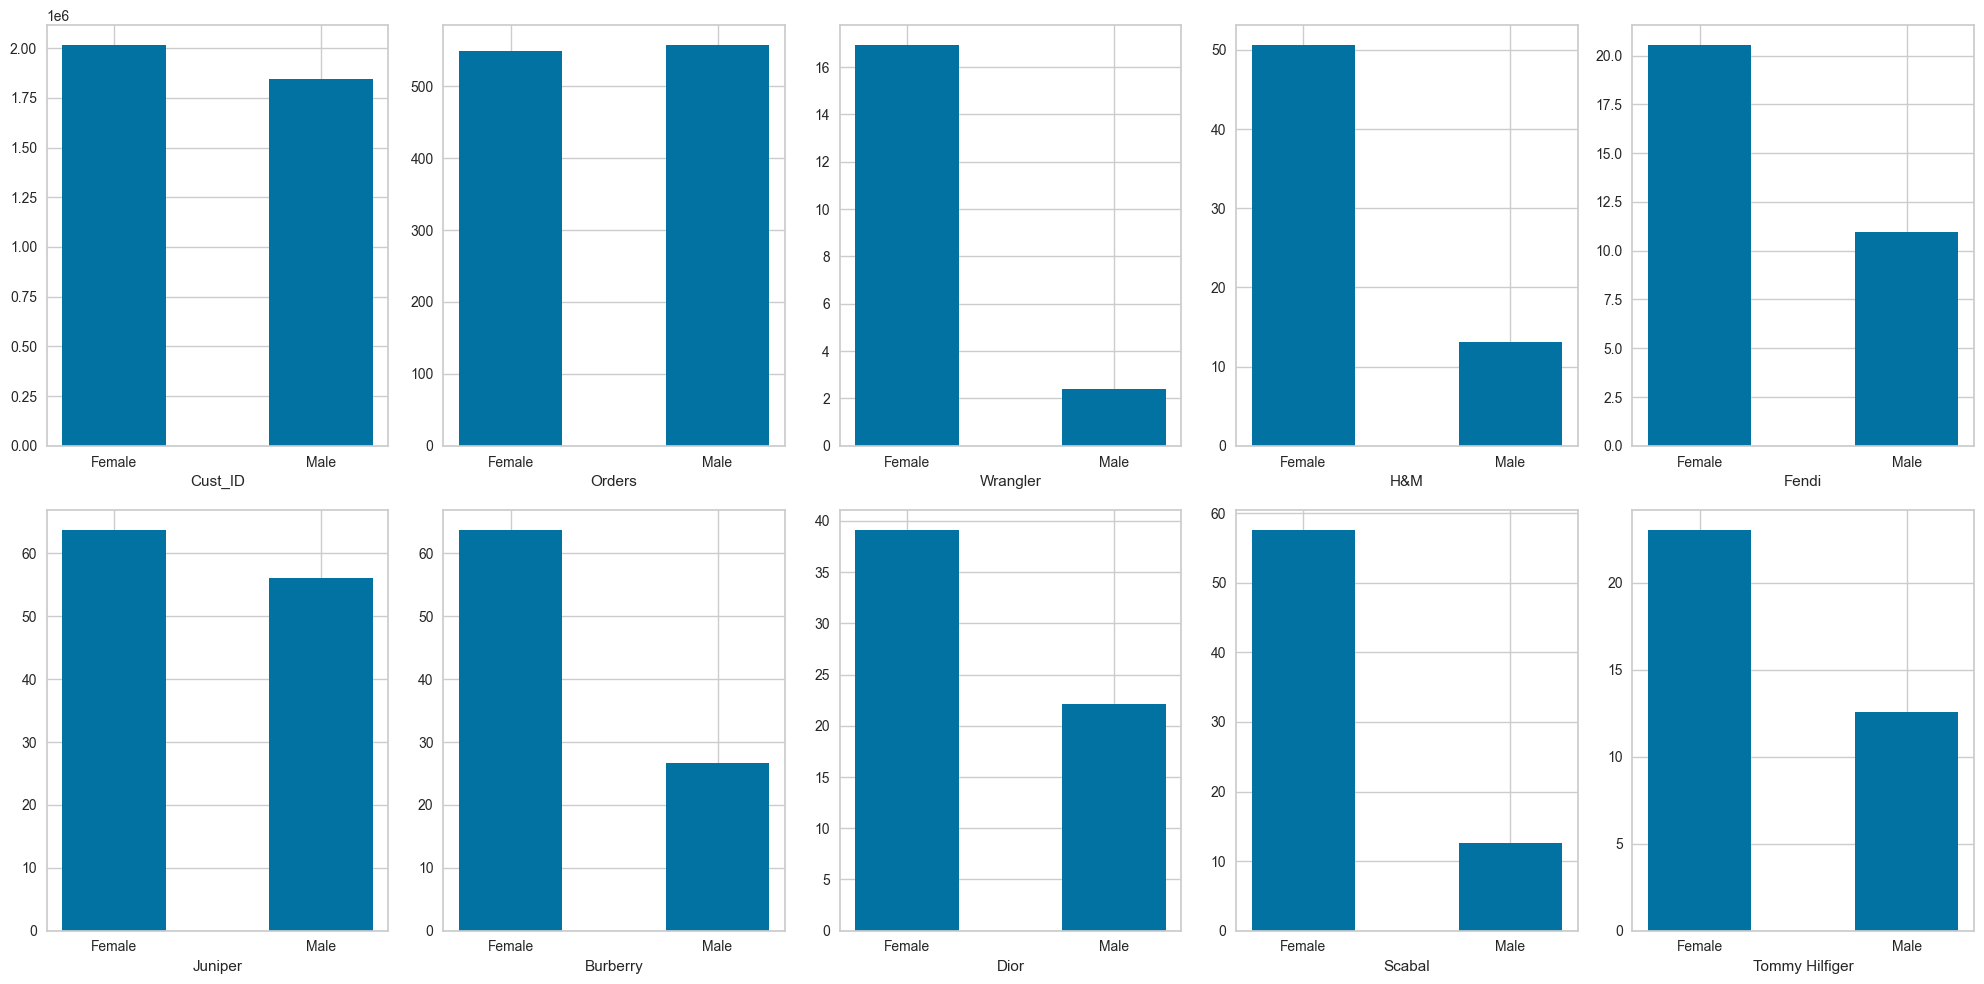

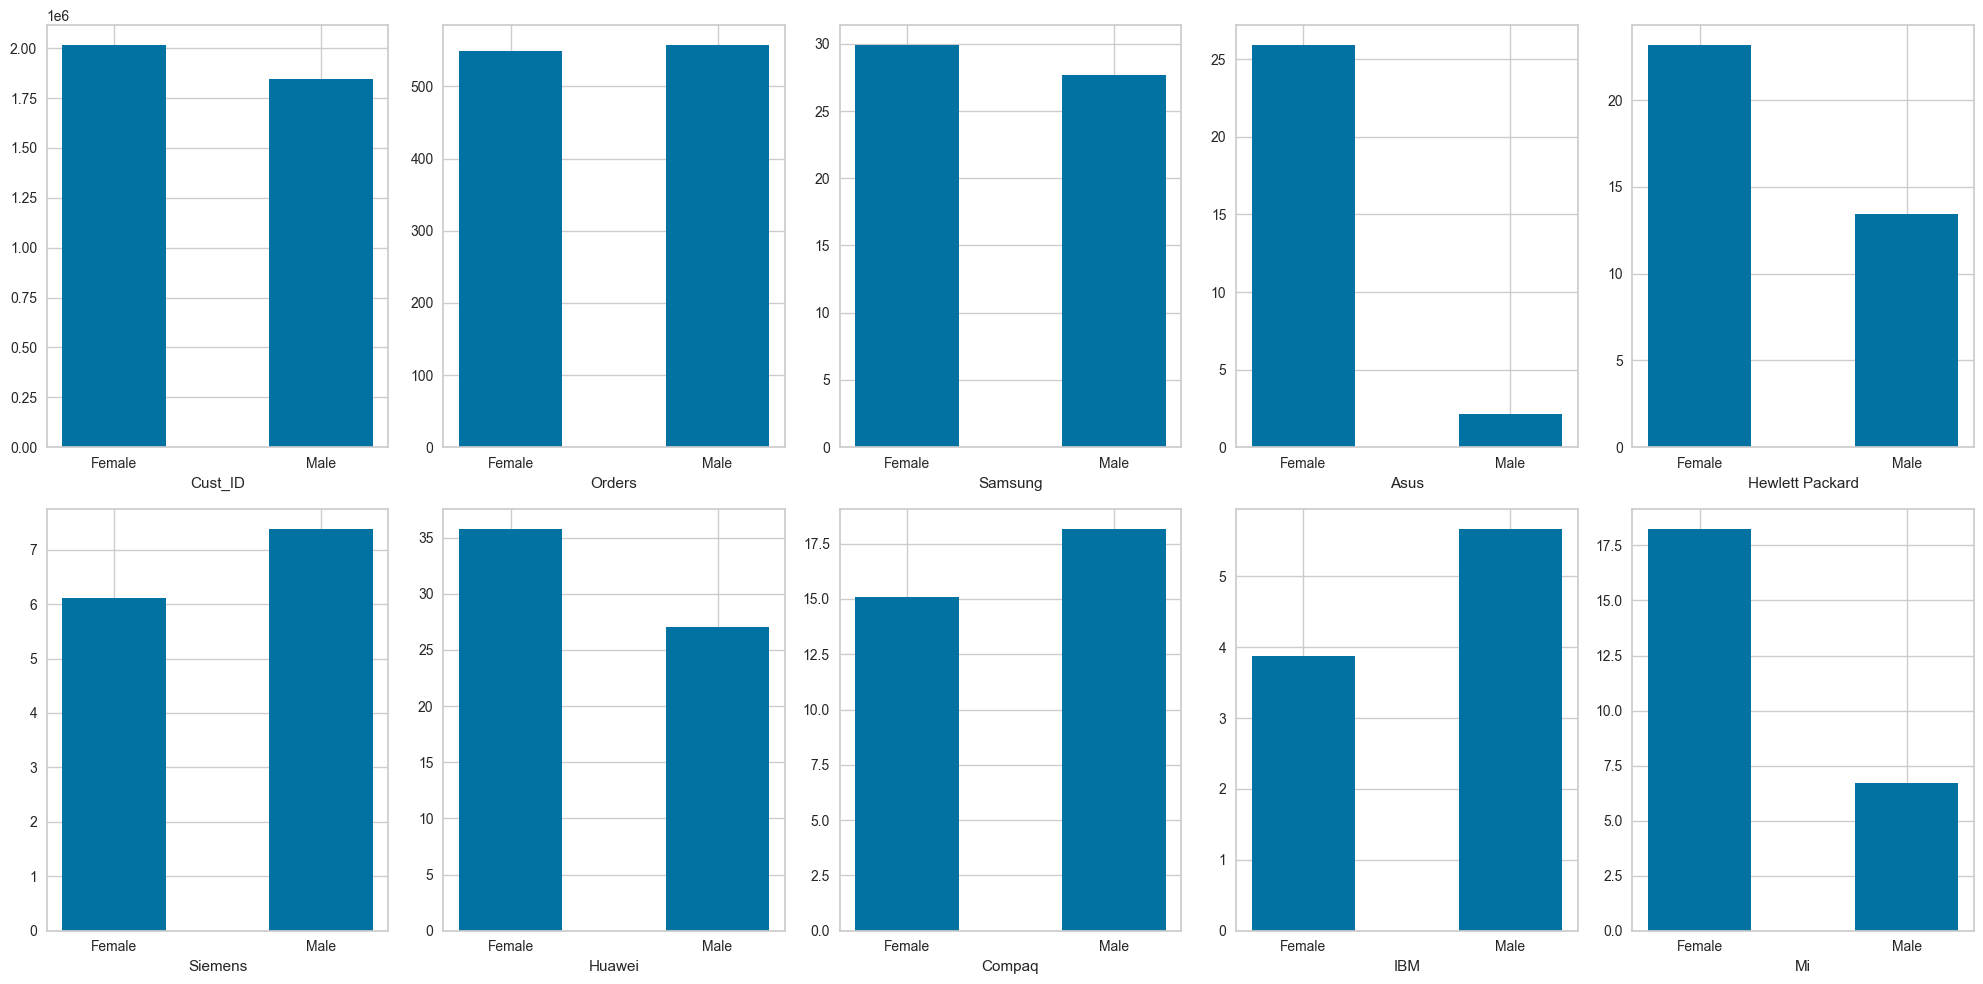

In [19]:
cols = [data_foot, data_food, data_apparel, data_tech]
for col in cols:
    inp = ((col.groupby('Gender').sum())/(col[col['Orders']>0].groupby('Gender').count()))*100
    plotting(inp)

### 5. Overall searches vs Genderwise searches

In [20]:
data['Orders'].value_counts()

Orders
0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: count, dtype: int64

In [21]:
df1 = data.groupby('Orders')[['Gender']].value_counts()

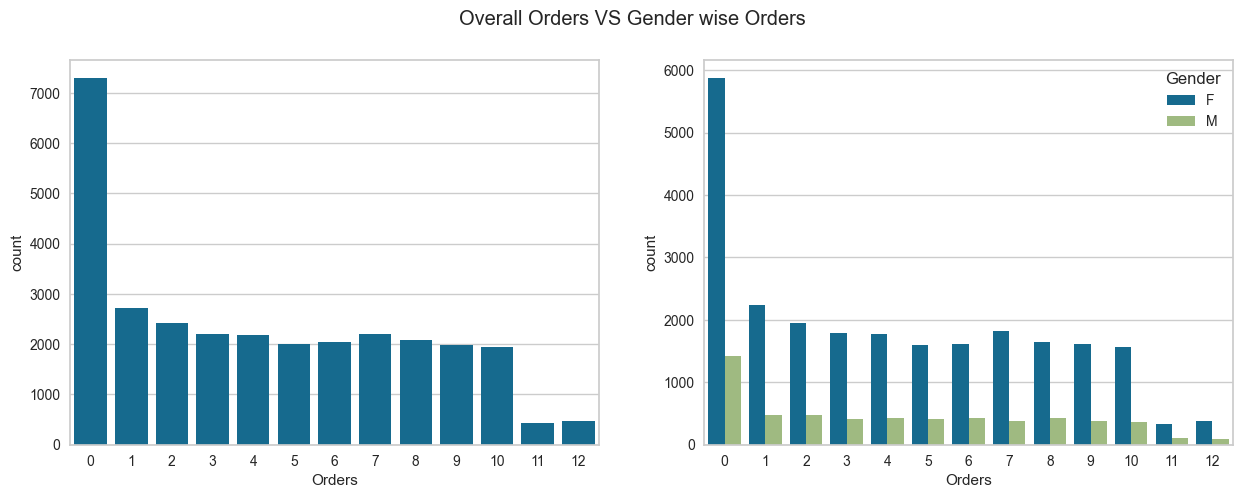

In [22]:
# Overall orders count
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='Orders')

# Orders count by each gender
plt.subplot(1,2,2)
sns.countplot(data=data,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

### 6. Correlation

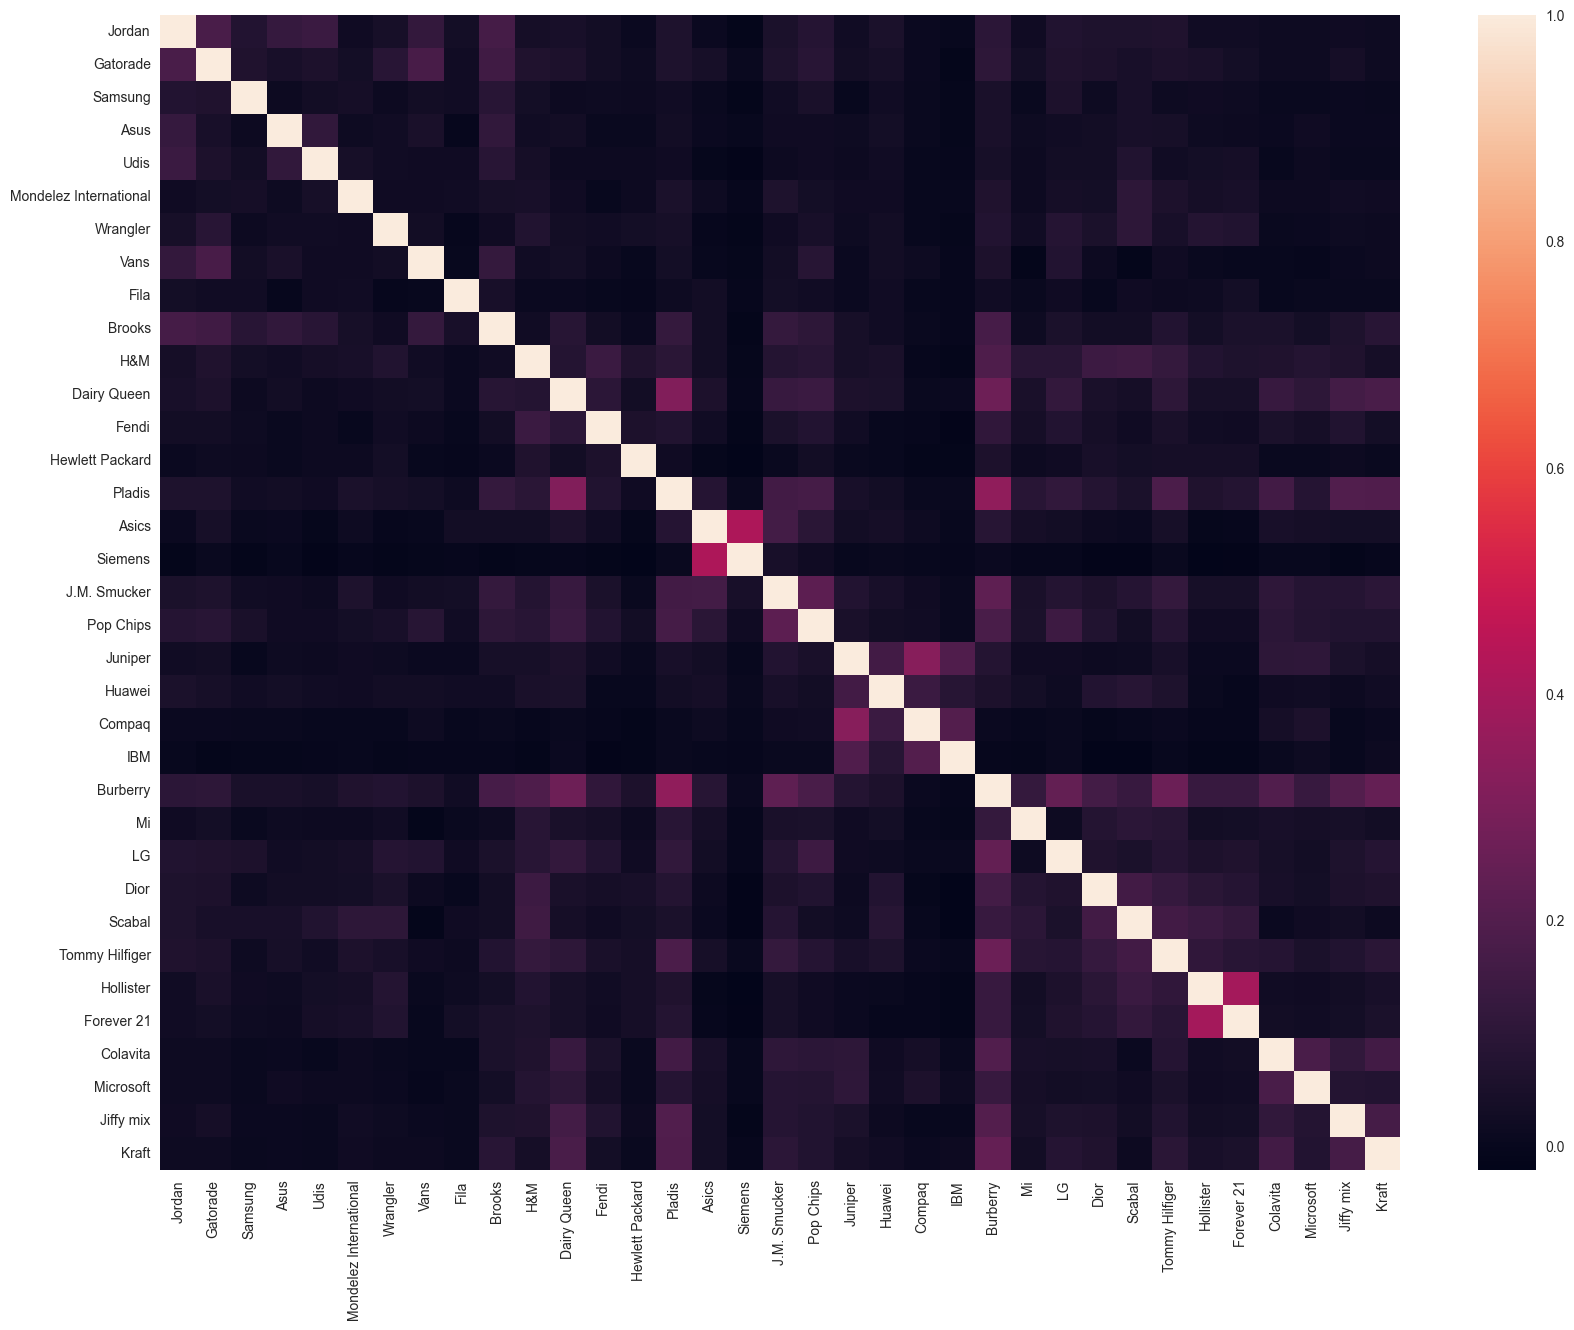

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data.iloc[:,3: ].corr())
plt.show()

### 7. Top 10 Customers

In [24]:
new_data = data.copy()
new_data['Total Search'] = new_data.iloc[:,3:].sum(axis=1)

In [25]:
new_data.sort_values('Total Search',ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,0,0,7,8,21,1,1,9,7,0,12,2,4,5,0,0,27,0,1,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,4,1,3,4,3,1,1,4,5,1,16,3,2,1,1,0,37,3,6,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,0,0,0,0,114,0,0,0,0,0,1,1,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,2,1,3,2,4,1,0,2,6,0,22,5,3,1,0,0,10,1,7,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,1,2,2,3,17,4,0,4,2,0,4,5,5,2,0,0,21,2,1,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


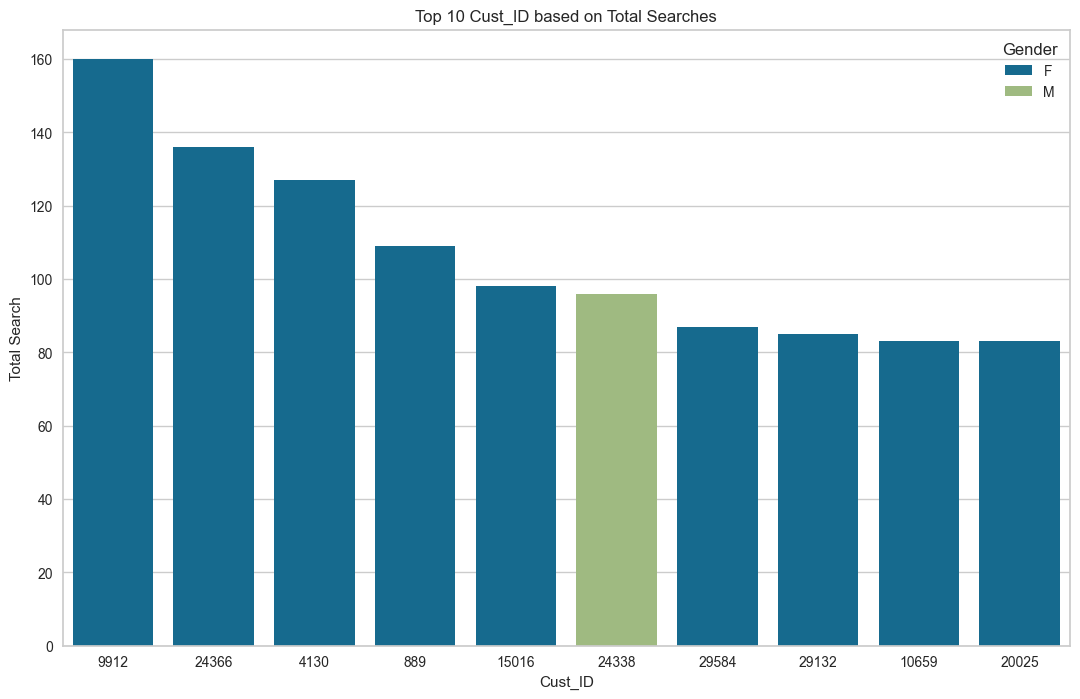

In [26]:
plt.figure(figsize=(13,8))
plt_data = new_data.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending = False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

### 8. Min Max scaling

In [27]:
x = data.iloc[:,2: ].values

In [28]:
scale = MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
features.shape

(30000, 36)

### 9. Finding Inertia of kmeans for optimal k

In [29]:
inertia = []
for i in range(1,16):
    k_means = KMeans(n_clusters=i)
    k_means = k_means.fit(features)
    inertia.append(k_means.inertia_)

### 10. K value and Silhouette value

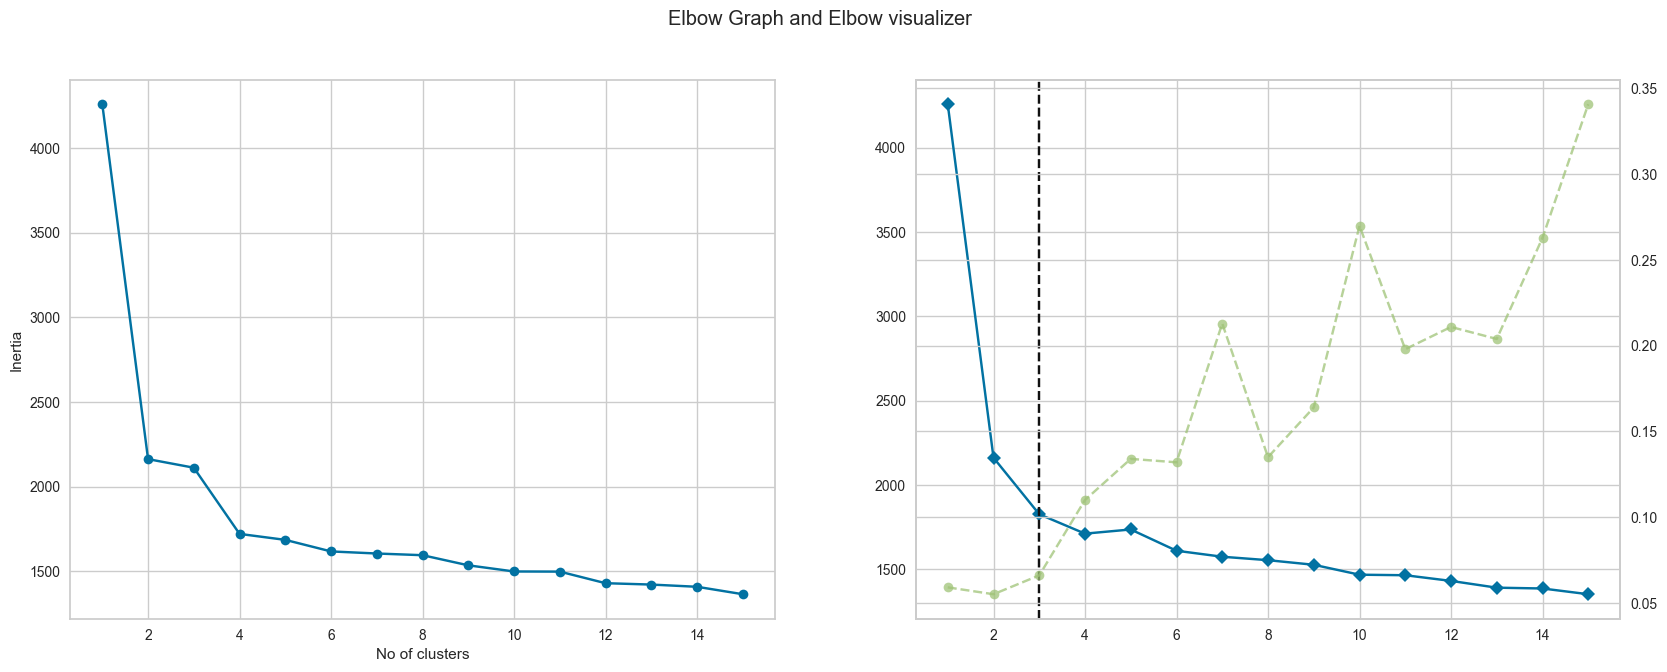

In [30]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans, k=(1,16))
visualize.fit(features)
plt.suptitle('Elbow Graph and Elbow visualizer')
plt.show()

### Points to consider to select best possible k value
1. For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score. The cluster with K=5 get eliminated because it doesn’t follow this condition.
2. There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points. For K=2, the blue cluster has almost twice the width as compared to the green cluster. This blue cluster gets broken down into two sub-clusters for K=4, and thus forms clusters of uniform size.
So, the silhouette plot approach gives us K=4 as the optimal value.

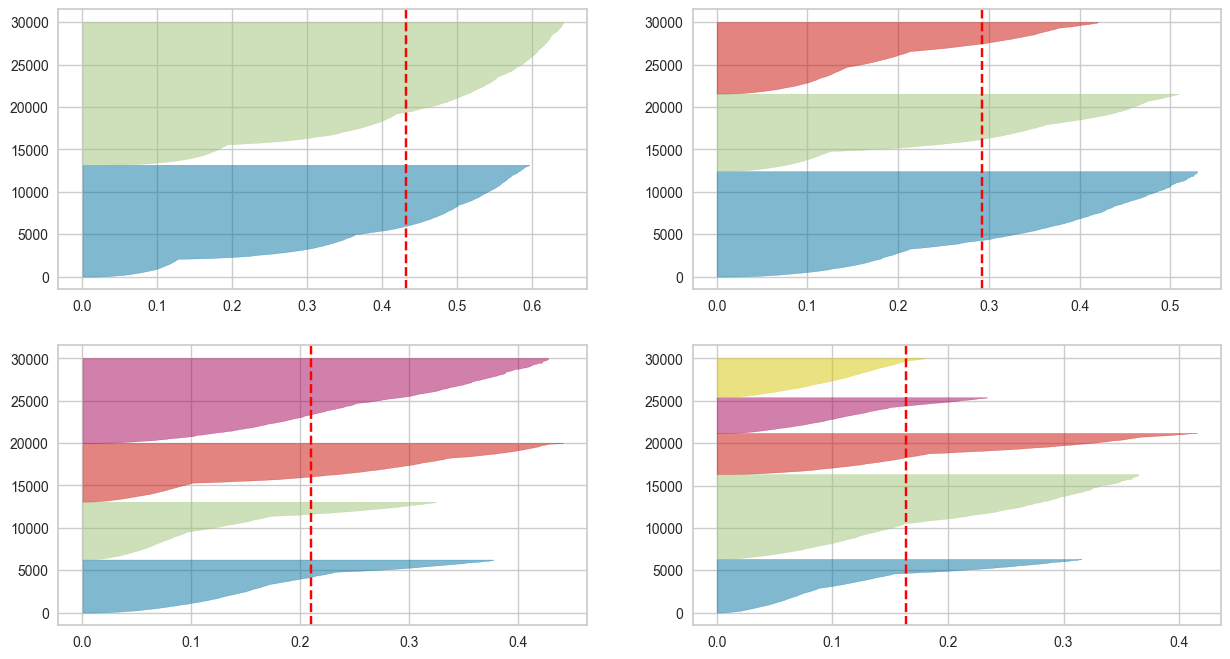

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features) 

In [32]:
silhouette = []
for i in range(2,16):
    kmeans = KMeans(n_clusters = i)
    cluster_labels = kmeans.fit_predict(features)
    silhouette.append(silhouette_score(features, cluster_labels))


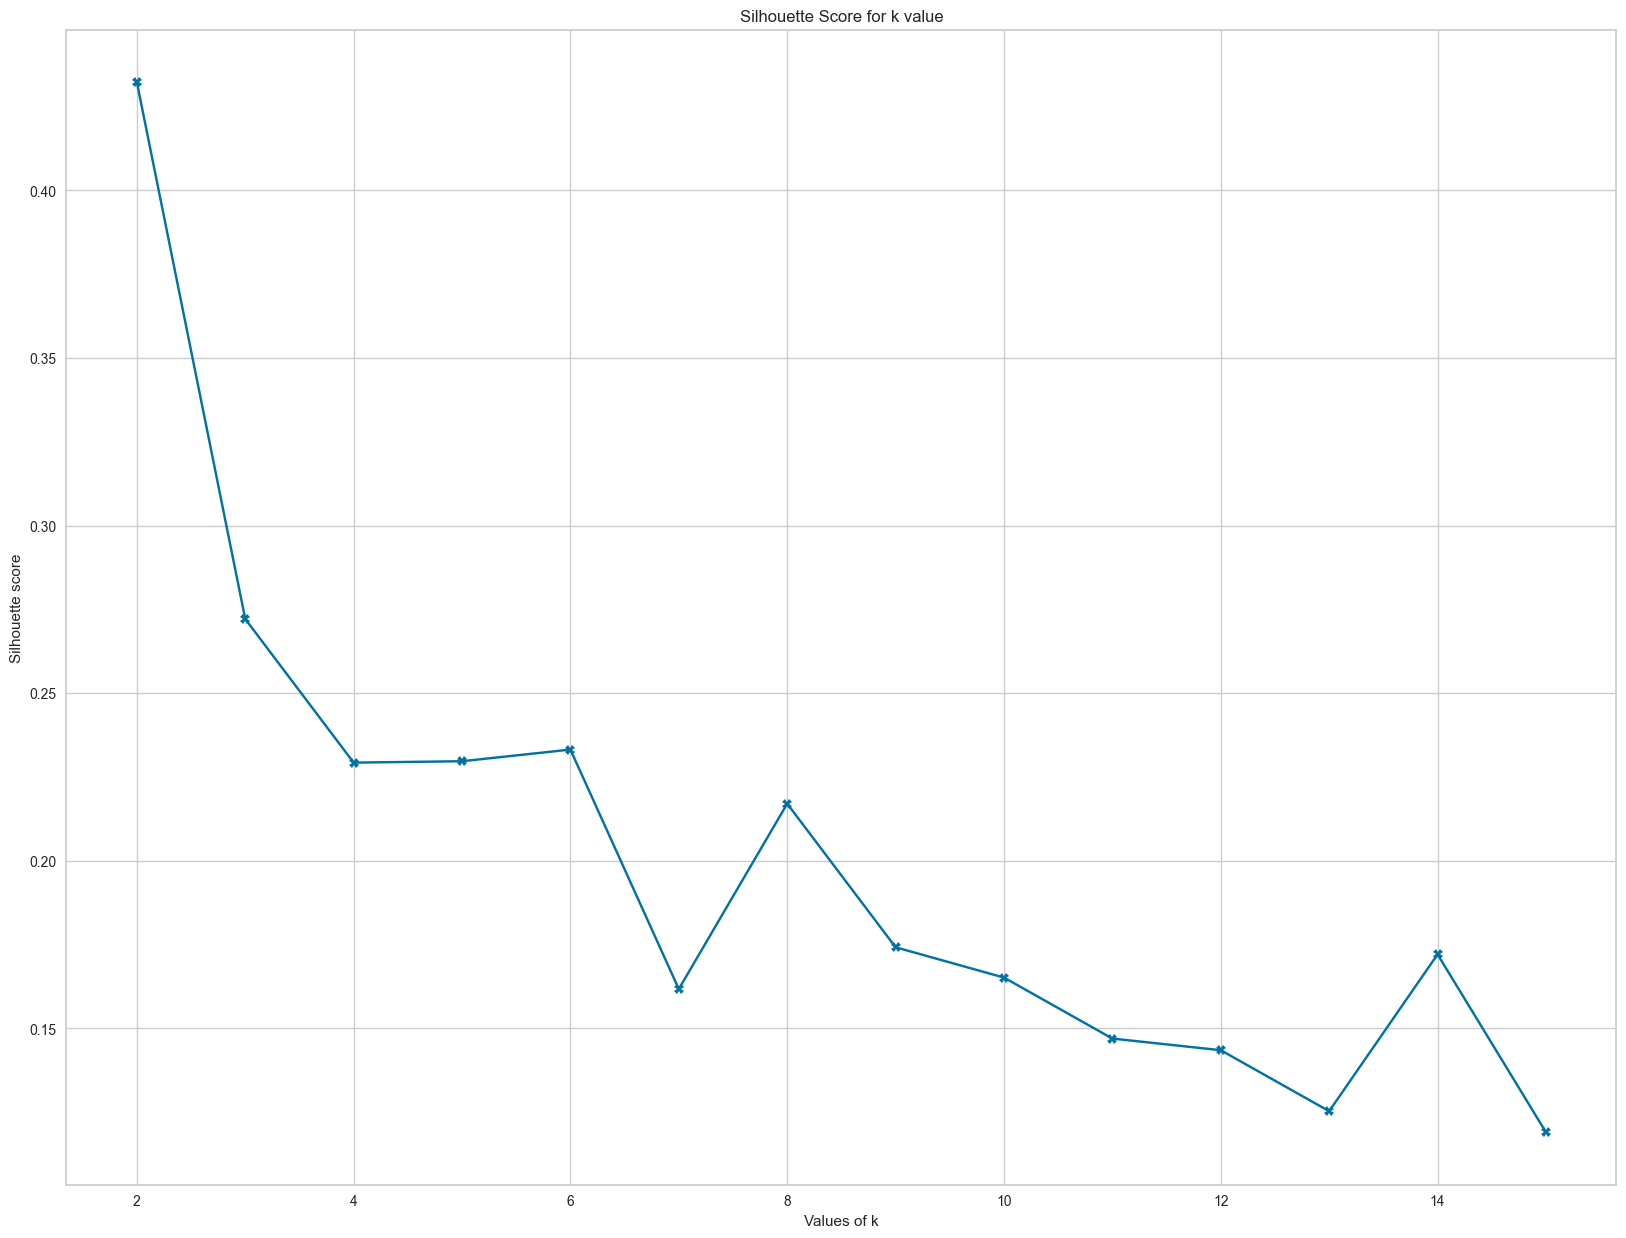

In [33]:
plt.figure(figsize=(20,15))
plt.plot(range(2,16), silhouette, 'bX-')
plt.xlabel('Values of k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for k value')
plt.show()

### 11. Model fit with calculated k

In [34]:
model = KMeans(n_clusters=4)
model_fit = model.fit(features)

In [35]:
y_km = model_fit.predict(features)
centers = model_fit.cluster_centers_

In [36]:
data['Cluster'] = pd.DataFrame(y_km)
data.to_csv('Cluster_info', index=False)

In [37]:
data['Cluster'].value_counts()

Cluster
1    12431
2     6402
0     6326
3     4841
Name: count, dtype: int64

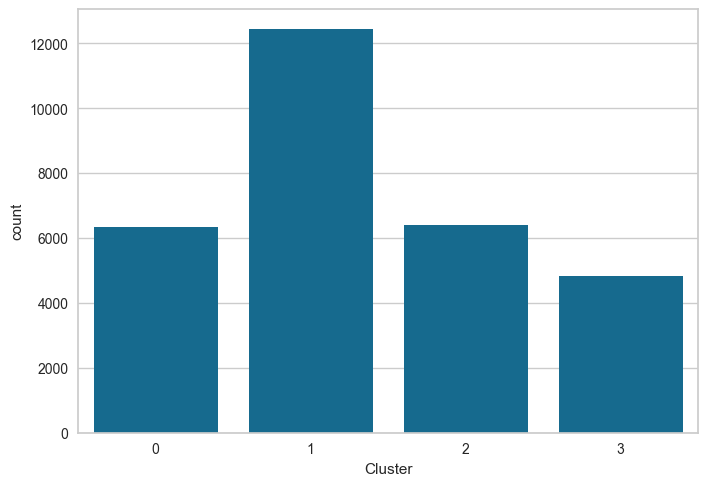

In [38]:
sns.countplot(data=data, x='Cluster')
plt.show()

In [39]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,3


In [40]:
data['Total_search'] = data.iloc[:,3:38].sum(axis=1)

### Cluster Analysis

In [41]:
# Clusters and their orders 
for i in range(0,4):
    print(data[data['Cluster']==i]['Orders'].unique())

[7 6 8]
[0 1 2]
[4 5 3 2]
[10  9 11 12]


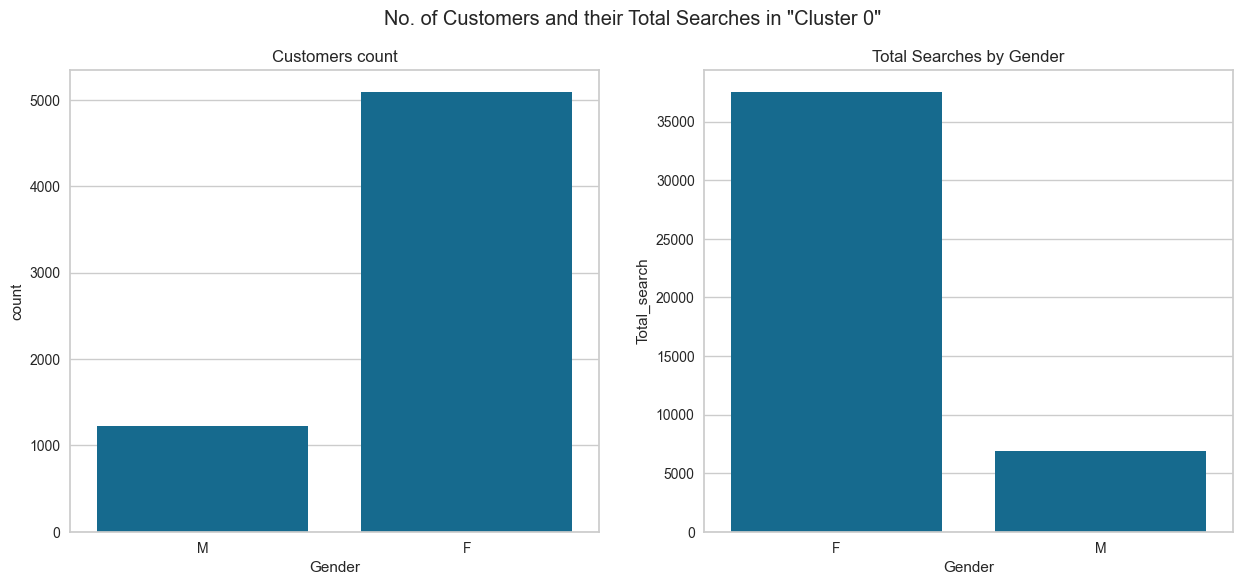

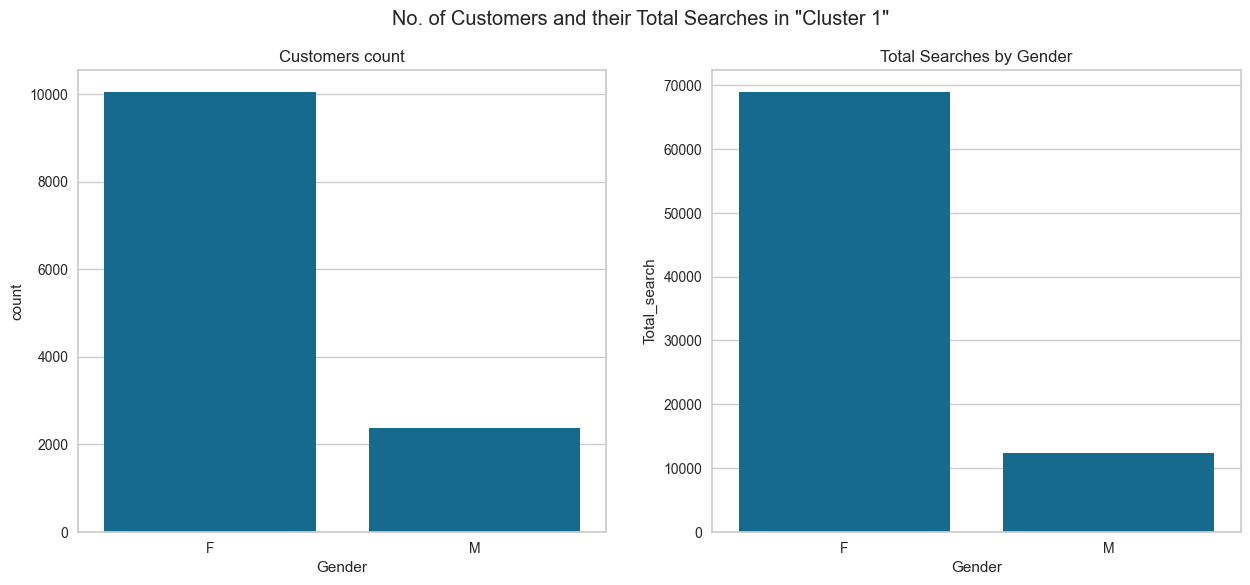

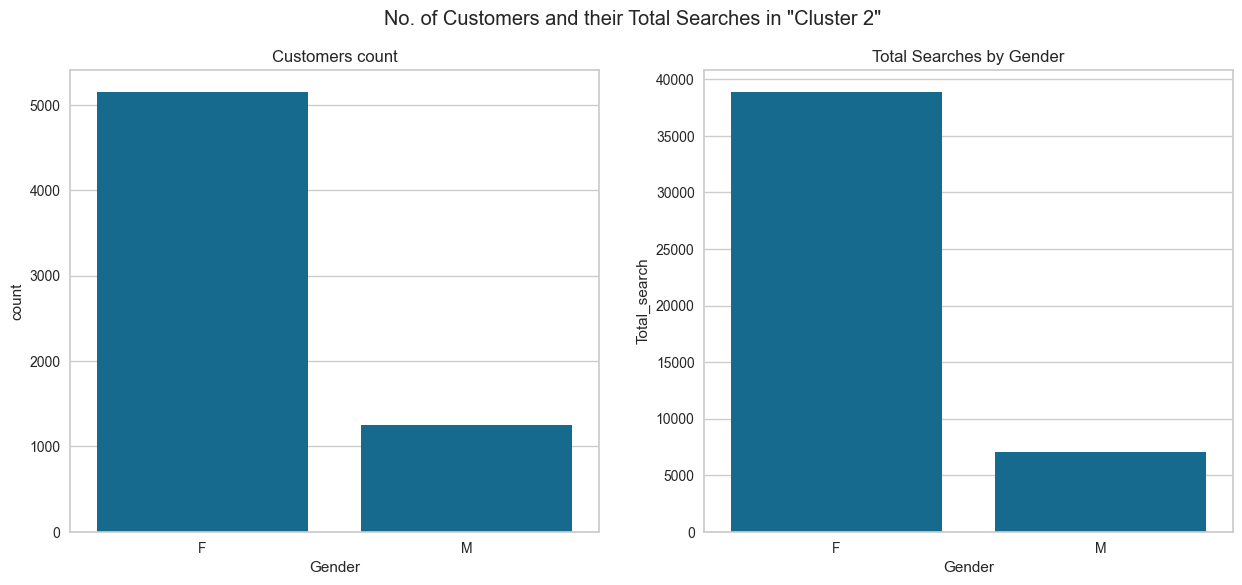

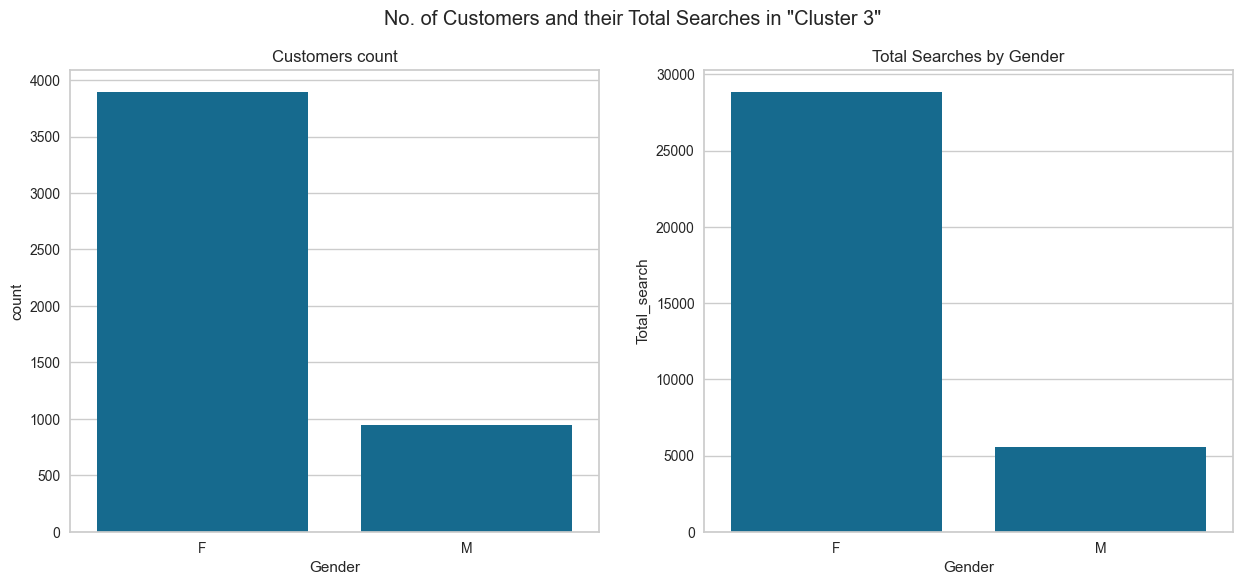

In [43]:
# Each Cluster description
for i in range(0,4):
    d = data.groupby(['Cluster','Gender'],as_index=False).sum().query(f'Cluster == {i}')
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.countplot(data=data.query(f'Cluster=={i}'), x='Gender')
    plt.title('Customers count')
    
    plt.subplot(1,2,2)
    sns.barplot(data=d,x='Gender',y='Total_search')
    plt.title('Total Searches by Gender')
    plt.suptitle(f'No. of Customers and their Total Searches in "Cluster {i}"')
    plt.show()

<Axes: xlabel='Gender', ylabel='count'>

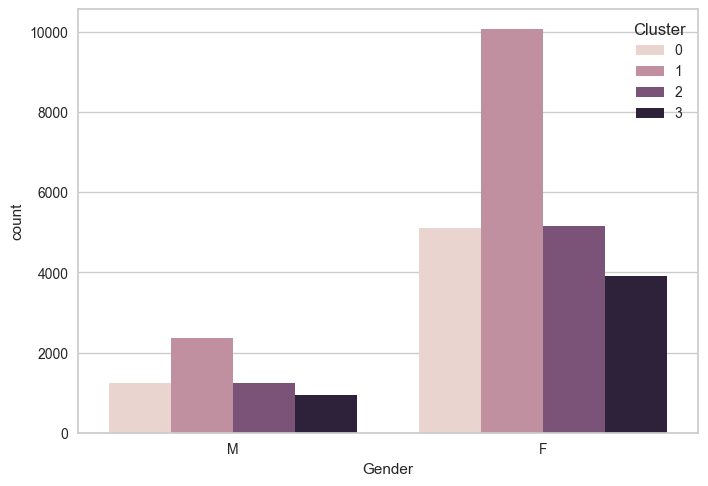

In [44]:
# total customers in 4 clusters
sns.countplot(data=data, x='Gender', hue='Cluster')

In [45]:
final_df = data.groupby(['Cluster'],as_index=False).sum()

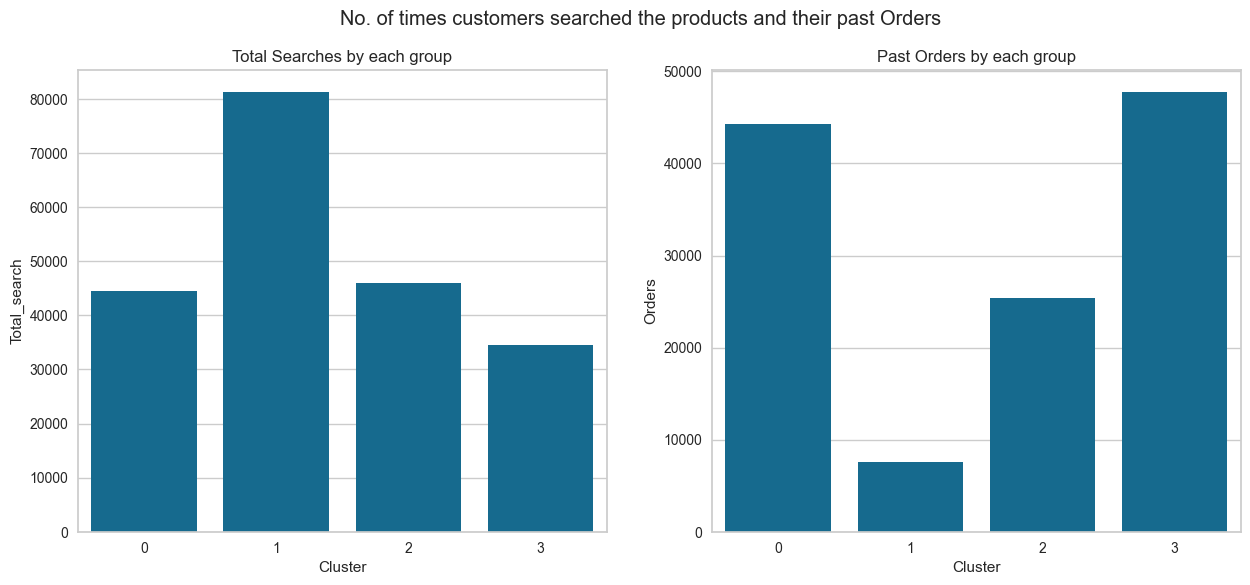

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total_search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past Orders by each group')
plt.suptitle('No. of times customers searched the products and their past Orders')
plt.show()